[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  1.   4.   9.  16.  25.  38.  45.  62.  86. 100.]
[ 0.1  0.4  0.9  1.6  2.5  3.8  4.5  6.2  8.6 10. ]
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 10
    # variables        = 3
    chi-square         = 37.4858182
    reduced chi-square = 5.35511688
    Akaike info crit   = 19.2137759
    Bayesian info crit = 20.1215311
[[Variables]]
    a:  0.84000349 +/- 2.72174773 (324.02%) (init = 0)
    b: -0.51818314 +/- 1.13671658 (219.37%) (init = 0)
    c:  0.95454556 +/- 0.10070881 (10.55%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.975
    C(a, b) = -0.909
    C(a, c) =  0.814


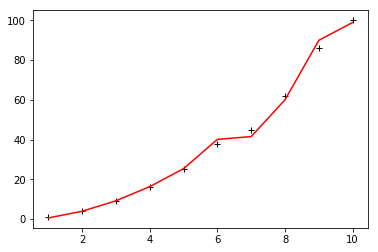

In [41]:
import numpy as np
#matplotlib 
from numpy import cos, sin
import matplotlib.pyplot as plt
#Import math module
#import math
#Import LMfit to minimize chi^2.
import lmfit
from lmfit import Minimizer, Parameters, report_fit
#from lmfit import minimize, Parameters

X,Y,Z = np.loadtxt('Test_XYZ.txt', skiprows=0, unpack=True)

print(X)
print(Y)
print(Z)

def Parabola(X,Z,a,b,c):
    #pars = [a,b,c]
    #Y = (pars[0] + pars[1] * X + pars[2] * X ** 2) #Also works!
    return (a + b * X + c * X ** 2 + Z) #works!

#d=5

#def chi(params, Q0ch,Q1ch,Q2ch,Q3ch,Q4ch,Q5ch,Q6ch,Q7ch,Q8ch,Q9ch,Q10ch,Q11ch,Q0m,Q1m,Q2m,Q3m,Q4m,Q5m,Q6m,Q7m,Q8m,Q9m,Q10m,Q11m):
def chi(params, X, Y, Z):
    
    a = params['a']
    b = params['b']
    c = params['c']
    
    #delta = (sigexp-XS(E0[0],theta[0]))/uncertainty
    #delta = (Y - (a + b * X + c * X ** 2))/0.001  #Works!
    delta = (Y - Parabola(X,Z,a,b,c))  #Also works!
    chi = delta 
    return chi

params = Parameters()
params.add('a', value=0)#, min=0)
params.add('b', value=0)#, min=0)
params.add('c', value=0)#, min=0)

minner = Minimizer(chi, params, fcn_args=(X, Y, Z))
result = minner.minimize()
final = Y + result.residual
report_fit(result)

#lmfit.printfuncs.report_fit(minner.params, min_correl=0.5)

plt.plot(X,Y,'k+')
plt.plot(X,final,'r')
plt.show()

In [28]:
from lmfit import Model


In [42]:
model=Model(Parabola, independent_vars=['X','Z'])
print(model.independent_vars,model.param_names)

['X', 'Z'] ['a', 'b', 'c']


In [43]:
result=model.fit(Y,X=X,Z=Z,a=0,b=0,c=0,weights=Z)

In [44]:
print(result.fit_report())

[[Model]]
    Model(Parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 10
    # variables        = 3
    chi-square         = 1671.46129
    reduced chi-square = 238.780184
    Akaike info crit   = 57.1886845
    Bayesian info crit = 58.0964398
[[Variables]]
    a: -5.89865855 +/- 21.0130682 (356.23%) (init = 0)
    b:  1.33110610 +/- 5.49464596 (412.79%) (init = 0)
    c:  0.83765268 +/- 0.35051996 (41.85%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.993
    C(a, b) = -0.986
    C(a, c) =  0.959



In [45]:
result.plot()

Fit can only be plotted if the model function has one independent variable.


False

In [41]:
print(result.ci_report())

      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a: -13.69943  -7.34515  -3.25616   0.93333  +3.25616  +7.34515 +13.69943
 b:  -5.72145  -3.06764  -1.35991  -0.57576  +1.35991  +3.06764  +5.72145
 c:  -0.50690  -0.27178  -0.12047   1.06061  +0.12047  +0.27178  +0.50690


In [9]:
print(result.best_values)

{'a': -6.554113534980411, 'b': 1.4790192287371056, 'c': 0.9307244324321509}


In [10]:
print(result.best_values['a'])

-6.554113534980411
